In [93]:
import requests

def download_csv(url, save_path="downloaded_data.csv"):
    """
    Downloads a CSV file from a given URL and saves it to a local file.

    Parameters:
    - url (str): The URL of the CSV file.
    - save_path (str): The local file path to save the CSV. Default is "downloaded_data.csv".

    Returns:
    - str: The path where the file is saved.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
        
        with open(save_path, "wb") as file:
            file.write(response.content)
        
        print(f"File successfully downloaded and saved as: {save_path}")
        return save_path
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")
        return None

# Example usage:
# url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# download_csv(url, "survey_data.csv")


In [94]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = download_csv(url, "survey-data.csv")

File successfully downloaded and saved as: survey-data.csv


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [97]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


In [98]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

In [99]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df_count = pd.read_sql_query(QUERY, conn)
df_count.head()


,COUNT(*)
0,65437


In [100]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [101]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [102]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df_table = pd.read_sql_query(QUERY, conn)
print(df_table.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [103]:
# Run a simple query to check the data
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Display the results
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [104]:
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]  # Remove top 1% outliers


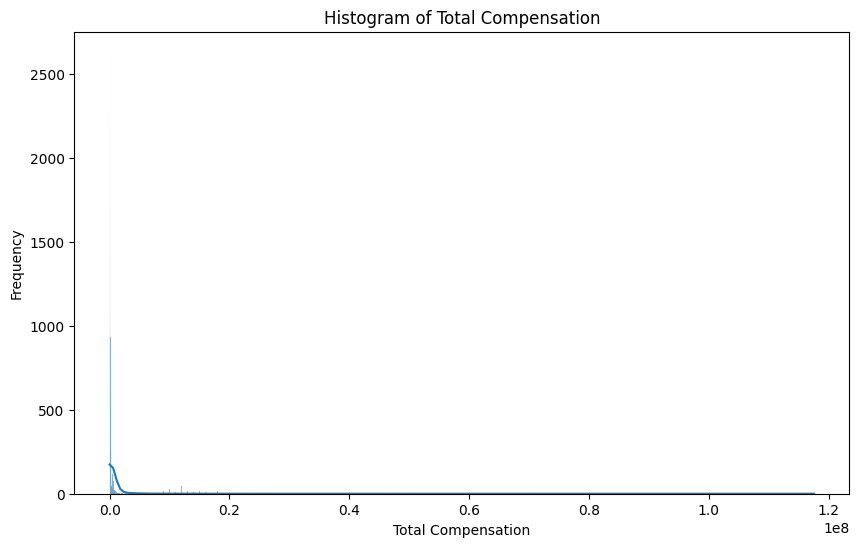

In [105]:
#  - **Histograms:**
# ```python
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'].dropna(), kde=True)
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

File successfully downloaded and saved as: survey-data.csv
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                              

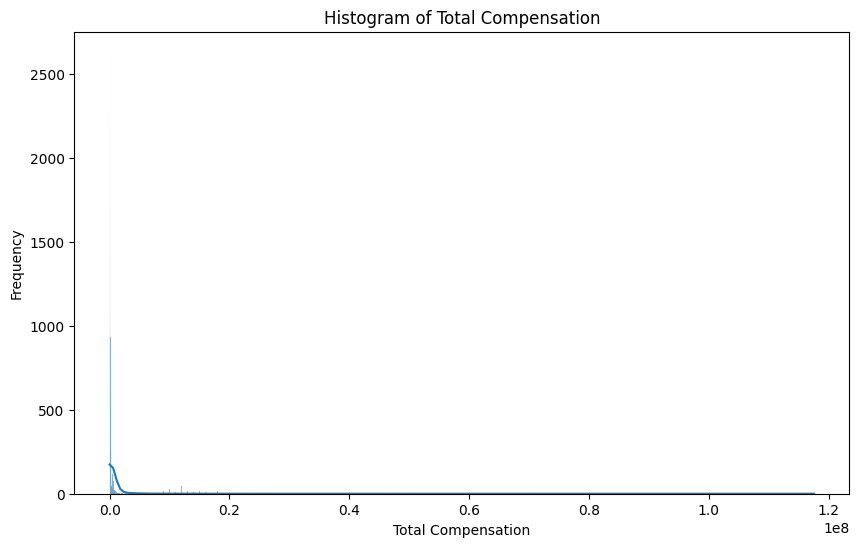

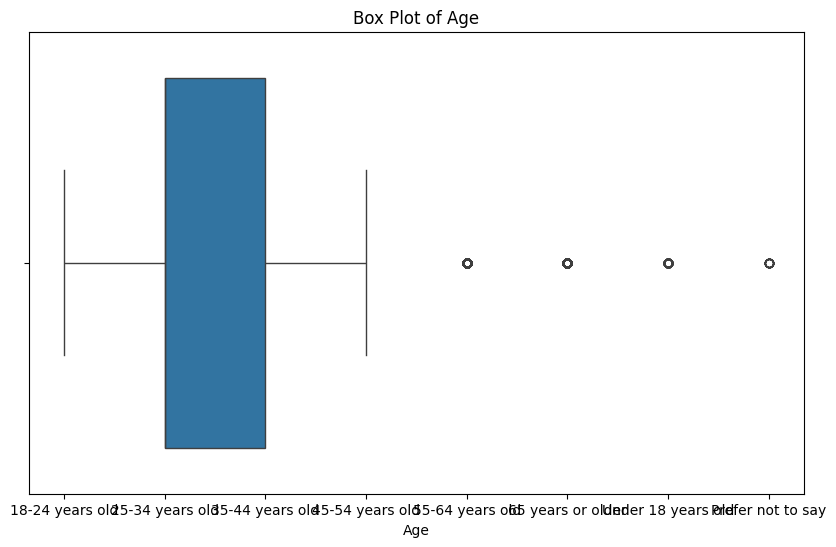

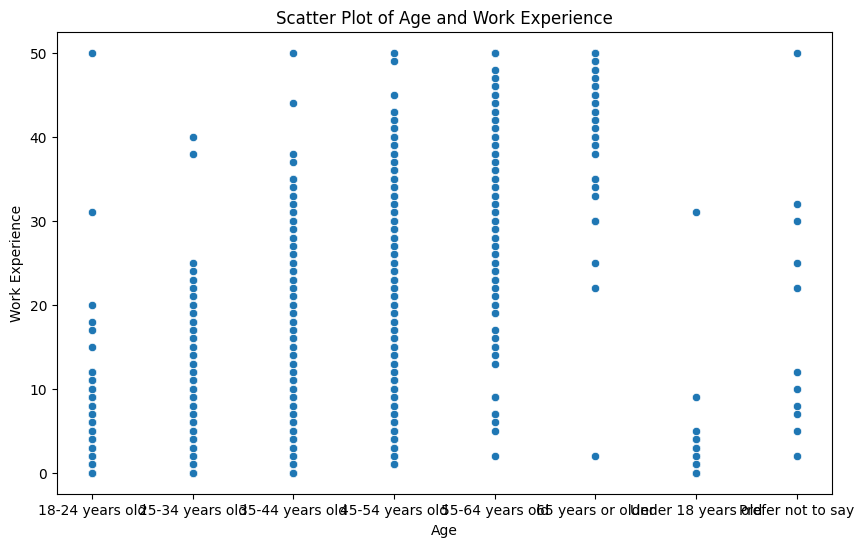

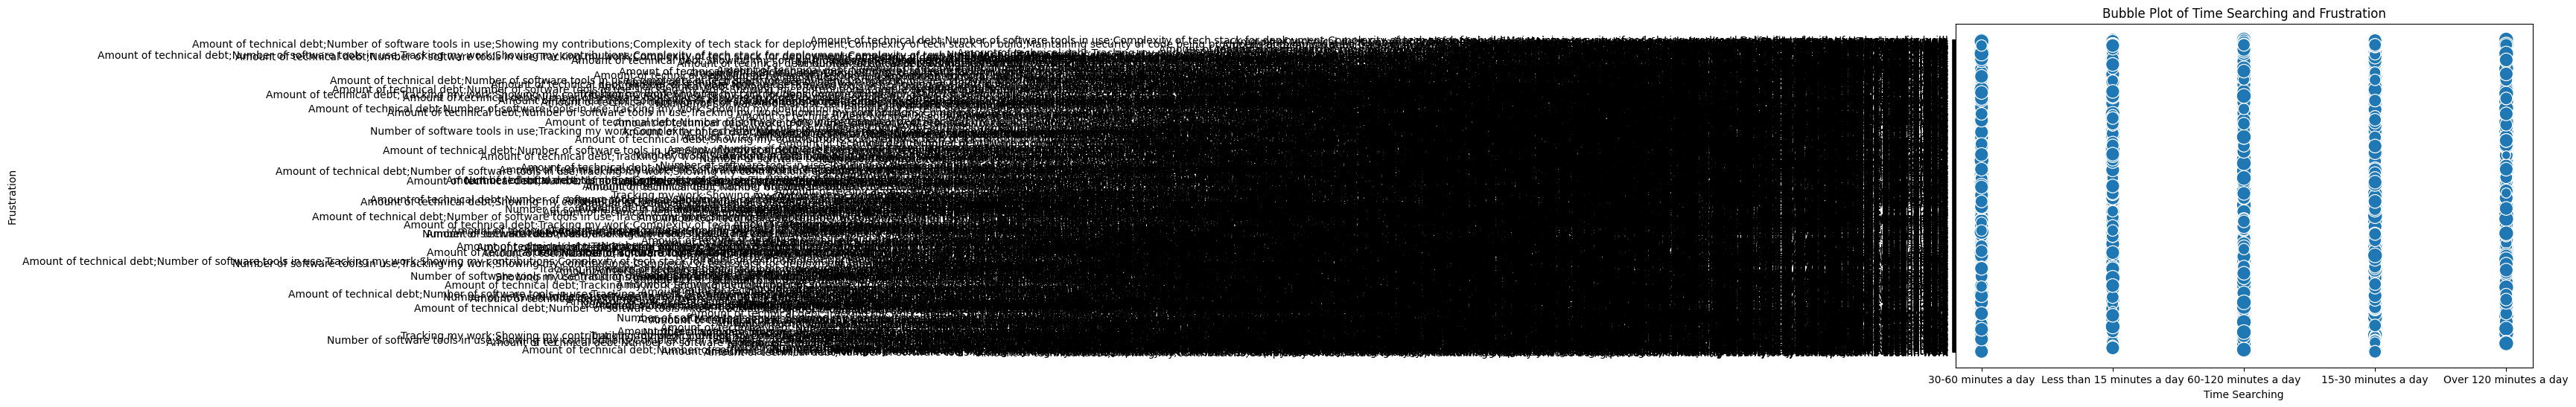

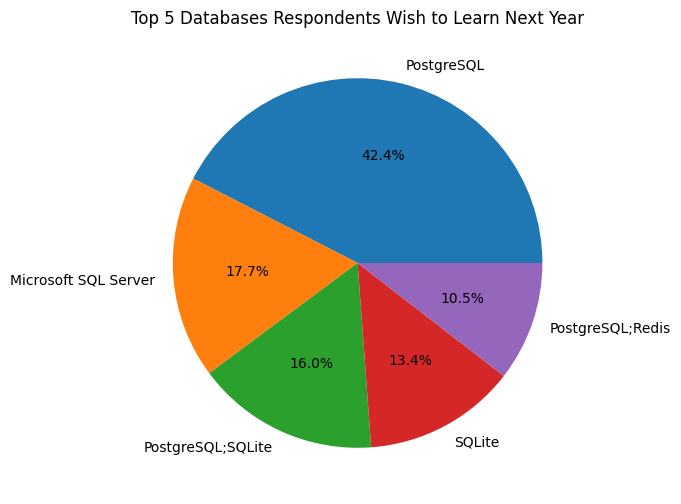

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_5248\3060575203.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace(mapping_dict)



Standardized 'TimeSearching' column.

Standardized 'TimeAnswering' column.

Standardized 'Age' column.
Median Time Searching: 45.0
Median Time Answering: 22.5


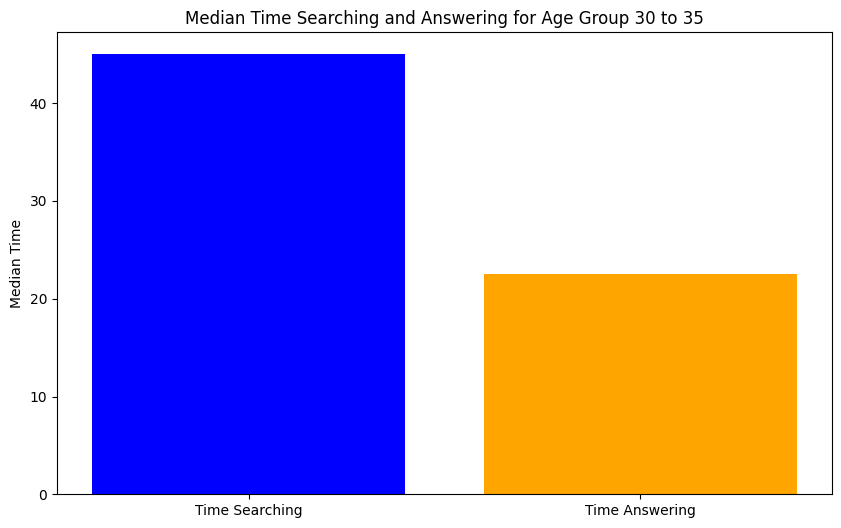

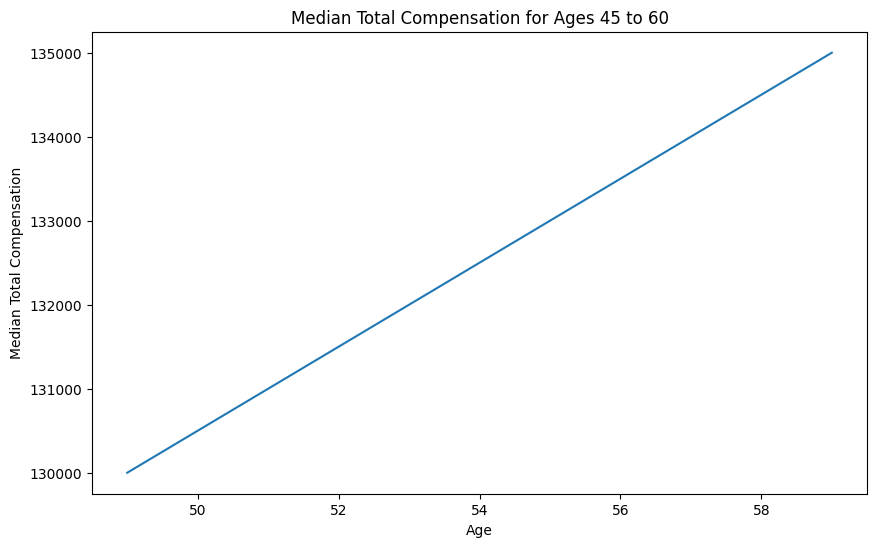

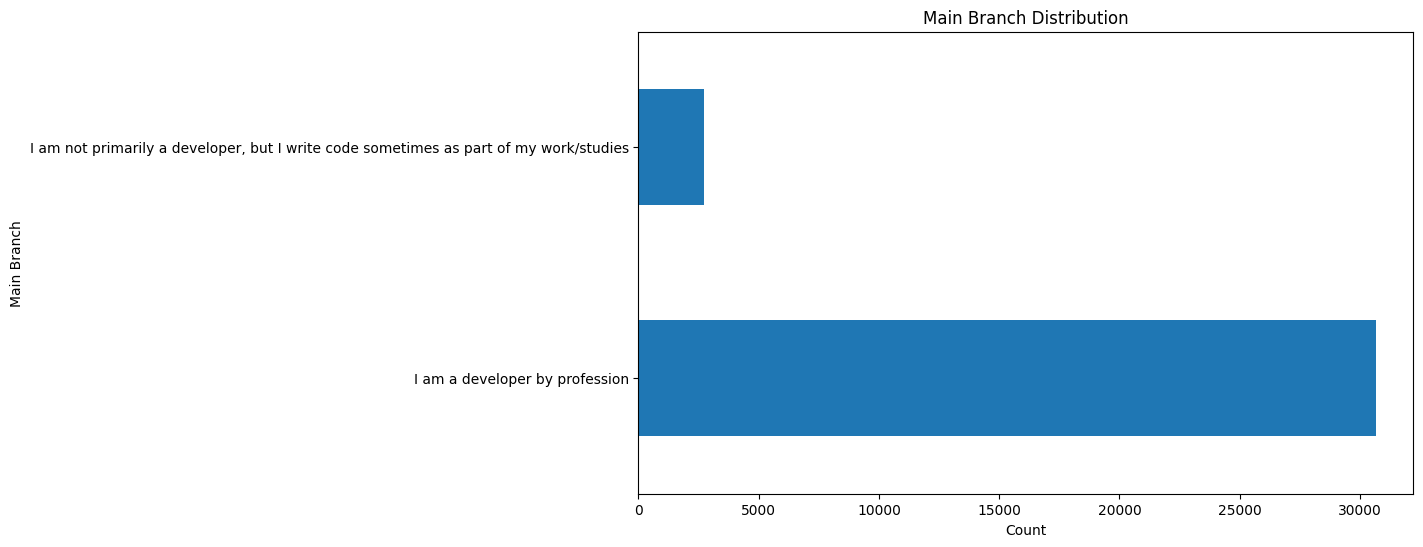

In [150]:
# Sure, I can help you with that! Here are the functions to implement the tasks according to your script:

# 1. **Download the database file:**
# ```python

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = download_csv(url, "survey-data.csv")

# ```

# 2. **Install and Import Necessary Python Libraries:**
# ```python
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
# ```

# 3. **Read the CSV File into a Pandas DataFrame:**
# ```python
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()
# ```

# 4. **Create a SQLite Database and Insert the Data:**
# ```python
conn = sqlite3.connect('survey-data.sqlite')
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()
# ```

# 5. **Verify the Data in the SQLite Database:**
# ```python
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

# ```

# 6. **Running an SQL Query:**
# ```python
query = "SELECT COUNT(*) FROM main"
df_count = pd.read_sql(query, conn)
df_count.head()
# ```

# 7. **Listing All Tables:**
# ```python
query = "SELECT name FROM sqlite_master WHERE type='table'"
pd.read_sql(query, conn)
# ```

# 8. **Running a Group By Query:**
# ```python
query = "SELECT Age, COUNT(*) as count FROM main GROUP BY Age"
pd.read_sql(query, conn)
# ```

# 9. **Describing a Table:**
# ```python
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df_table = pd.read_sql_query(QUERY, conn)
print(df_table.iat[0,0])
# ```
# Run a simple query to check the data
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Display the results
df.head()

# 10. **Visualizing the Distribution of Data:**

def handle_missing_data(df):
    """Handles missing data by imputation or removal."""
    for col in df.columns:
        if df[col].dtype == 'object':  # Impute categorical columns with mode
            df[col] = df[col].fillna(df[col].mode()[0])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64': # Impute numerical with median
            df[col] = df[col].fillna(df[col].median())

    return df

#handle_missing_data(df)

# due to 'CompTotal' is the error: Maximum allowed size exceeded
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]  # Remove top 1% outliers
# - **Histograms:**
# ```python
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'].dropna(), kde=True)
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()
# ```

# - **Box Plots:**
# ```python
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'].dropna())
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()
# ```

# 11. **Visualizing Relationships in Data:**

# - **Scatter Plots:**
# ```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkExp', data=df)
plt.title('Scatter Plot of Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()
# ```

# - **Bubble Plots:**
# ```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TimeSearching', y='Frustration', size='Age', data=df, legend=False, sizes=(20, 200))
plt.title('Bubble Plot of Time Searching and Frustration')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.show()
# ```

# 12. **Visualizing Composition of Data:**

# - **Pie Charts:**
# ```python
top_5_databases = df['DatabaseWantToWorkWith'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_databases.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.ylabel('')
plt.show()
# ```

# - **Stacked Charts:**
# ```python

def standardize_entries(df, column_name, mapping_dict):
    """
    Standardizes entries in a column by mapping inconsistent values to a consistent format.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column to standardize.
        mapping_dict (dict): A dictionary mapping old values to new standardized values.

    Returns:
        pd.DataFrame: The DataFrame with standardized column entries.
    """
    df[column_name] = df[column_name].replace(mapping_dict)
    print(f"\nStandardized '{column_name}' column.")
    return df

# Map Age to approximate numeric values (assuming Age is in string format)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 32,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Create a dictionary to map the text values to numeric values (in minutes):
time_mapping = {
    'Less than 15 minutes a day': 2.5,
    '5-10 minutes a day': 7.5,
    '10-15 minutes a day': 12.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# Apply the Mapping to Convert Strings to Numbers FIRST
df = standardize_entries(df, 'TimeSearching', time_mapping)
df = standardize_entries(df, 'TimeAnswering', time_mapping)

# Convert Columns to Numeric
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

# Ensure Age is Numeric
df = standardize_entries(df, 'Age', age_mapping)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# ✅ NOW filter after ensuring numeric conversion
age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Compute Median
median_time_searching = age_group['TimeSearching'].median()
median_time_answering = age_group['TimeAnswering'].median()

print("Median Time Searching:", median_time_searching)
print("Median Time Answering:", median_time_answering)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Time Searching', 'Time Answering'], [median_time_searching, median_time_answering], color=['blue', 'orange'])
plt.title('Median Time Searching and Answering for Age Group 30 to 35')
plt.ylabel('Median Time')
plt.show()
# ```

# 13. **Visualizing Comparison of Data:**

# - **Line Chart:**
# ```python
age_45_60 = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
median_comp_total = age_45_60.groupby('Age')['CompTotal'].median()

plt.figure(figsize=(10, 6))
median_comp_total.plot.line()
plt.title('Median Total Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.show()
# ```

# - **Bar Chart:**
# ```python
main_branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
main_branch_counts.plot.barh()
plt.title('Main Branch Distribution')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()
# ```

# Feel free to run these functions and let me know if you need any further assistance!

In [147]:
df['TimeAnswering'].unique()


array([ 90. ,   nan,   2.5,  45. ,  22.5, 150. ])

In [146]:
df['TimeSearching'].unique()


array([ 45. ,   nan,   2.5,  90. ,  22.5, 150. ])

In [149]:
print(df['TimeSearching'].dtype)
print(df['TimeAnswering'].dtype)


float64
float64


In [135]:
df['TimeAnswering']

72       90.0
374       NaN
379       2.5
385       NaN
389       2.5
         ... 
65396     NaN
65401     NaN
65408     NaN
65412    22.5
65431     NaN
Name: TimeAnswering, Length: 33402, dtype: float64

In [131]:
df['TimeSearching']

72                               45
374                            None
379      Less than 15 minutes a day
385                            None
389                              90
                    ...            
65396                          None
65401                          None
65408                          None
65412                          22.5
65431                          None
Name: TimeSearching, Length: 33402, dtype: object

In [113]:
print(df['Age'].dtype)

float64


In [115]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,21.0,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",29.0,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,39.0,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,39.0,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,29.0,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65396,65397,I am a developer by profession,21.0,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65401,65402,I am a developer by profession,29.0,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;On the job training;Other online res...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65408,65409,I am a developer by profession,29.0,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65412,65413,I am a developer by profession,39.0,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,8.0


In [123]:
df['Age']

72       21.0
374      29.0
379      39.0
385      39.0
389      29.0
         ... 
65396    21.0
65401    29.0
65408    29.0
65412    39.0
65431    49.0
Name: Age, Length: 33388, dtype: float64

In [122]:
age_group

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
